<h2>Crimes rates per Neighborhood</h2>
<p>Using data from the WRPDC, we can gauge overall criminal activity in each Pittsburgh neighborhood. This data could potentially give us an idea of which neighborhood has the most violent and experienced residents, and can help estimate the possibility of 2 emerging tributes becoming victors.</p>

<p><code>WRPDC - "Police Incident Blotter"</code>
<br>from January 2016 - present</p>
<a href='#'>https://data.wprdc.org/dataset/uniform-crime-reporting-data</a>

In [2]:
# Importing packages for data analysis
import pandas as pd
import geopandas
import numpy as np
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./data/crime-data.csv")

# Indexes for column names
count = 0
for i in data.columns:
    print(f"column {count}: {i}")
    count+=1

column 0: PK
column 1: CCR
column 2: HIERARCHY
column 3: INCIDENTTIME
column 4: INCIDENTLOCATION
column 5: CLEAREDFLAG
column 6: INCIDENTNEIGHBORHOOD
column 7: INCIDENTZONE
column 8: INCIDENTHIERARCHYDESC
column 9: OFFENSES
column 10: INCIDENTTRACT
column 11: COUNCIL_DISTRICT
column 12: PUBLIC_WORKS_DIVISION
column 13: X
column 14: Y


In [5]:
cols = data.INCIDENTNEIGHBORHOOD.value_counts()

# Comment out to see full data
# pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cols)

South Side Flats             15069
Central Business District    13445
Carrick                       9153
Bloomfield                    7037
Shadyside                     6724
                             ...  
Chartiers City                 246
Outside State                  244
Outside County                 177
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 80
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


<h3>Cleaning our Data</h3>
<p>Now that we have a good idea of what our data looks like, we are going to have to clean it to get rid of irrelevant entries. For instance, we can get rid of 'Outside State', 'Outside County', 'Mt. Oliver Boro', etc. as they are not really neighborhoods.</p>

In [7]:
filters = [
    'Outside State',
    'Outside County', 
    'Outside City', 
    'Mt. Oliver Boro', 
    'Mt. Oliver Neighborhood', 
    'Golden Triangle/Civic Arena'
]

pattern = '|'.join(filters)

query_mask = data['INCIDENTNEIGHBORHOOD'].str.contains(pattern, na=False, case=False)==0
data = data[query_mask]
cols = data.INCIDENTNEIGHBORHOOD.value_counts() # update cols

print(cols)

South Side Flats             15069
Central Business District    13445
Carrick                       9153
Bloomfield                    7037
Shadyside                     6724
                             ...  
Swisshelm Park                 346
New Homestead                  278
Ridgemont                      259
Troy Hill-Herrs Island         252
Chartiers City                 246
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64


In [8]:
# Converting our data in pandas DataFrame so we can
# merge it with geopandas and map out results
crime_by_hood = pd.DataFrame({'Neighborhood':cols.index, 'num_incidents':cols.values})
crime_by_hood.head()

,Neighborhood,num_incidents
0,South Side Flats,15069
1,Central Business District,13445
2,Carrick,9153
3,Bloomfield,7037
4,Shadyside,6724


<h3>Mapping our results</h3>
<p>Using geopandas, we can map out our results in a heat map, to get a better idea of which areas of the city are "hot" and dangerous.

In [12]:
# Checking correct map of Pittsburgh
neighborhoods = geopandas.read_file("./data/Neighborhoods/Neighborhoods_.shp")
plt.style.use("dark_background")
crime_map = neighborhoods.merge(crime_by_hood, how='left', left_on="hood", right_on='Neighborhood')

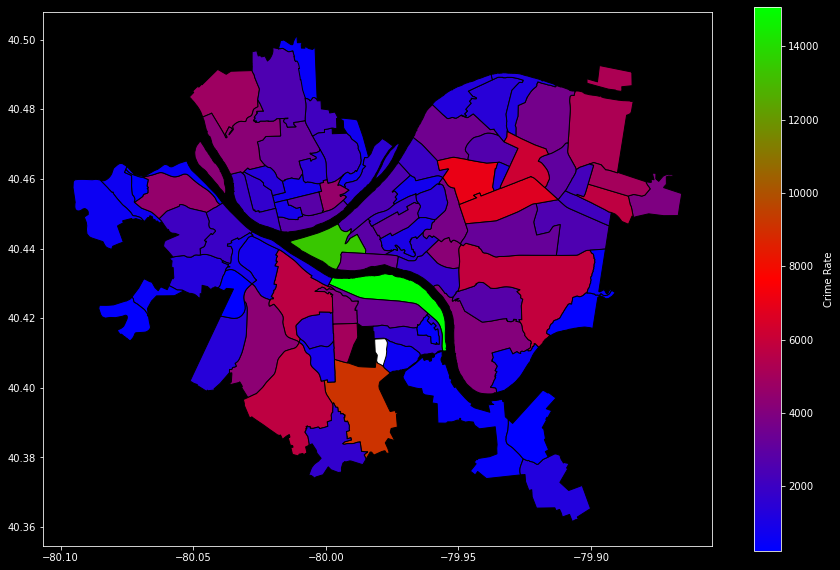

In [13]:
# Mapping crime rates to Pittsburgh with custom parameters

crime_map.plot(column='num_incidents',     # set the data to be used for coloring
               cmap='brg',                 # choose a color palette
               edgecolor="black",          # outline the districts in white
               legend=True,                # show the legend
               legend_kwds={'label': "Crime Rate"}, # label the legend
               figsize=(15, 10),           # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )

<h3>Map Results</h3>
<p>As we can see from our data, South Side Flats and the Central Business District have far more reported crime-related incidents than any other neighborhoods. But that doesn't paint the whole picture so we should now see if we can relate the number of reported incidents with the severity of the crime committed. This will help us gauge the ruthlessness of potential tributes. For this we can take a look at the <code>OFFENSES</code> column in our dataset.